# Analiza podatkov o hišah
Zajela sem podatke o ponudbah nakupa hiše v Sloveniji. Dobila sem jih s spletne strani nepremicnine.net. Sedaj bom pridobljene podatke analizirala.
Pri tem želim odgovoriti na naslednje hipoteze:
* Ali vpliva leto izgradnje na ceno?
* Je v Ljubljani cena hiš veliko večja?
* Za katere regije je bolj značilna gradnja dvojčkov in večjih hiš?
* Se lahko opazi kakšen trend kakšne hiše so bile grajene glede na leto izgradnje?

In [77]:
import pandas as pd
import numpy as np


In [186]:
hise = pd.read_csv("hise.csv")

## Leto gradnje ali leto adaptacije
Pri analizi podatkov pridem do problema, ko ne vem katero leto je bolje uporabiti. Nekatere hiše imajo podano le leto gradnje, spet druge le leto adaptacije, pri nekaterih pa imam podana oba podatka. Podatka nista enaka, zato tega ne morem kar zanemariti.

Zato bom dodala dodaten stolpec, kjer bom pri hišah s podanim letom adaptacije in letom gradnje vzela mlajšo letnico (leto adaptacije), pri tistih ki pa imajo le leto adaptacije pa kar to leto. S tem sicer zanemarim nekaj razlik med hišami, pa vendar sklepam, da je adaptacija bila dovolj dobra in to ne bi smelo biti ključnega pomena.

Za lažjo primerjavo sem dodala tudi ceno na kvadratni meter.

In [187]:
hise["leto"] = hise[["leto_gradnje", "leto_adaptacije"]].values.max(1)
hise["cena_m2"] = hise.cena / hise.povrsina
hise

,id,cena,regija,upravna,obcina,leto_gradnje,leto_adaptacije,povrsina,gradnja,leto,cena_m2
0,6467192,480000.0,LJ-mesto,Lj. Moste-Polje,Ljubljana,2022,0,187.99,samostojna,2022,2553.327305
1,6387983,275000.0,Gorenjska,Radovljica,Bled,1800,1950,400.00,samostojna,1950,687.500000
2,6462270,180000.0,Gorenjska,Radovljica,Bohinj,1892,1950,188.70,vrstna,1950,953.895072
3,6506148,680000.0,LJ-mesto,Lj. Šiška,Ljubljana,1975,0,385.00,samostojna,1975,1766.233766
4,6475865,239800.0,Savinjska,Celje,Celje,2022,0,139.40,dvojček,2022,1720.229555
...,...,...,...,...,...,...,...,...,...,...,...
3234,6489255,214900.0,LJ-okolica,Domžale,Domžale,1986,0,110.00,samostojna,1986,1953.636364
3235,6475309,230000.0,Posavska,Brežice,Brežice,1900,2008,539.06,samostojna,2008,426.668645
3236,6475636,142000.0,Gorenjska,Škofja Loka,Železniki,2021,0,235.00,vrstna,2021,604.255319
3237,6495022,138000.0,Gorenjska,Škofja Loka,Železniki,1980,0,270.00,samostojna,1980,511.111111


### Ali vpliva izbira leta adaptacije kar za leto izgradnje na ceno?
Glede na to da sem v zgornjem odseku zanemarila razliko med letom gradnje in adaptacije, bom preverila, če obstaja razlika v ceni med hišami, ki so bile grajene prej in nato adaptirane, ter pa med tistimi, ki so bile zgrajena istega leta adaptacije.

In [326]:
hise["zaokrozeno_leto_adaptacije"] = 10 * (hise.leto_adaptacije // 10)
hise_adaptacija = hise[hise.zaokrozeno_leto_adaptacije >= 1900].groupby("zaokrozeno_leto_adaptacije")["cena_m2"].mean().to_frame("Gradnja in adaptacija")
hise["zaokrozeno_leto_gradnje"] = 10 * (hise.leto_gradnje // 10)
hise_gradnja = hise[(hise.leto_adaptacije == 0) & (hise.zaokrozeno_leto_gradnje >= 1900)].groupby("zaokrozeno_leto_gradnje")["cena_m2"].mean().to_frame("Gradnja")
df = pd.concat([hise_adaptacija, hise_gradnja], axis = 1)
df.sort_index()

,Gradnja in adaptacija,Gradnja
1900,904.829352,1635.227949
1910,NaN,1179.112554
1920,NaN,1499.836829
1930,975.609756,1152.693606
1940,519.923994,2130.045029
1950,1226.038976,1785.284665
1960,1061.087093,1620.025214
1970,1264.992147,1562.188363
1980,1583.771360,1285.430479
1990,1755.526696,1653.280595


<AxesSubplot: >

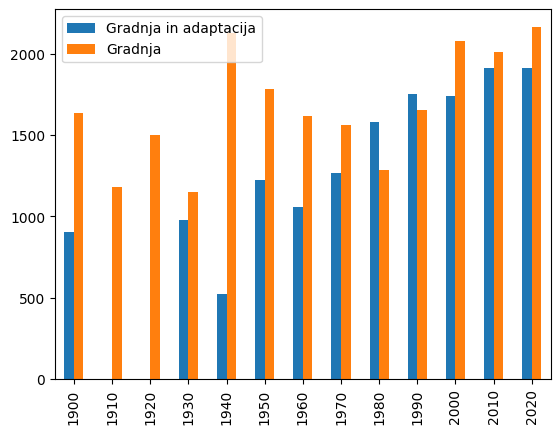

In [327]:
df.sort_index().plot.bar()

V zgodnejših letih je razlika v ceni velika, predvsem v letih med 1840 in 1950, kjer imajo hiše ki so bile grajene preij in v teh letih le adaptirane kar 4x manjšo povprečno ceno. Nato se zgodi preobrat med leti 1980 in 2000 kjer so adaptirane hiše presentljivo celo nekoliko dražje. Od 2000 naprej pa cene novogradnje v primerjavi z adaptiranimi ne odstopajo več toliko kot cene prve polovice 19. stoletja.
Ugotavljam da bom pri posplošitvi leta gradnje pri podatkih do leta 1950 s tem povzročila več netočnosti, medtem ko v kasnejših letih to ne bo povzročilo toliko odstopanj. 

## Vpliv leta na ceno?
Sedaj bom pogledala, kako se razlikuje cena prodajnih hiš gleda na leto kdaj so bile zgrajene oz.adaptirane.

<AxesSubplot: xlabel='zaookrozeno_leto'>

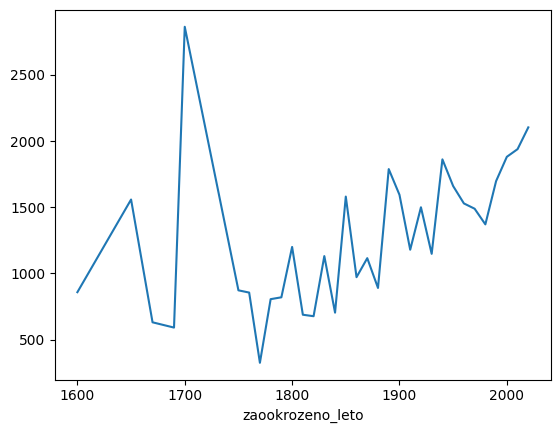

In [335]:
hise["zaookrozeno_leto"] = 10 * (hise.leto // 10)
hise[(hise.leto != 0) & (hise.leto >= 1600)].groupby("zaookrozeno_leto")["cena_m2"].mean().plot()

In [340]:
hise[hise.zaookrozeno_leto == 1700].sort_values("cena_m2", ascending=False)

,id,cena,regija,upravna,obcina,leto_gradnje,leto_adaptacije,povrsina,gradnja,leto,cena_m2,zaokrozeno_leto_adaptacije,zaokrozeno_leto_gradnje,zaookrozeno_leto
2349,6515490,420000.0,J. Primorska,Piran,Piran,1700,0,53.4,samostojna,1700,7865.168539,0,1700,1700
164,6201264,2800000.0,Gorenjska,Radovljica,Bled,1700,0,680.0,samostojna,1700,4117.647059,0,1700,1700
1893,6468404,140000.0,J. Primorska,Koper,Koper,1700,0,75.0,samostojna,1700,1866.666667,0,1700,1700
1580,6515735,550000.0,Podravska,Maribor,Maribor,1700,0,300.0,samostojna,1700,1833.333333,0,1700,1700
1215,6514933,68000.0,LJ-okolica,"Lj. J&Z del (Vič, Rudnik)",Velike Lašče,1700,0,80.0,samostojna,1700,850.000000,0,1700,1700
2872,6448068,60000.0,Savinjska,Laško,Laško,1707,0,92.7,samostojna,1707,647.249191,0,1700,1700


Gledam le hiše grajene po leto 1600, saj je za leta pred tem hiš zelo malo in tej podatki niso zanesljivi. Cena za hiše glede na leto gradnje narašča, kar je pričakovano. Veliko odstopanje je v letih okoli 1700, zato sem to pobližje pogledala. To povroča neka hiša iz Pirana, katere cena na kvadratni meter je kar 7865. Pri tem lahko da je prišlo tudi do kakšne napake pri pobiranju podatkov s spleta. 
Cene ne rastejo enakomerno, do tega lahko da je prišlo ker nisem opredelila vhodnih parametrov kakšne hiše gledam (tj. hiše z bazeni, mestne hiše, podeželske hiše itd.)

## Število hiš po regijah in razlikovanje med cenami
Pobližje bom pogledala koliko je ponudb hiš glede na regijo in kakšna je povprečna cena za neko regijo.

In [200]:
stevilo_his = hise.groupby("regija").size().to_frame("količina")
cene_his = hise.groupby("regija")["cena_m2"].mean()
df = pd.concat([stevilo_his, cene_his], axis=1)
df

,količina,cena_m2
regija,,
Dolenjska,194,918.090188
Gorenjska,276,2025.963303
J. Primorska,427,2868.554190
Koroška,48,875.717362
LJ-mesto,405,2897.324820
LJ-okolica,534,2034.190729
Notranjska,58,754.392775
Podravska,487,1215.427329
Pomurska,137,745.923459


<AxesSubplot: ylabel='regija'>

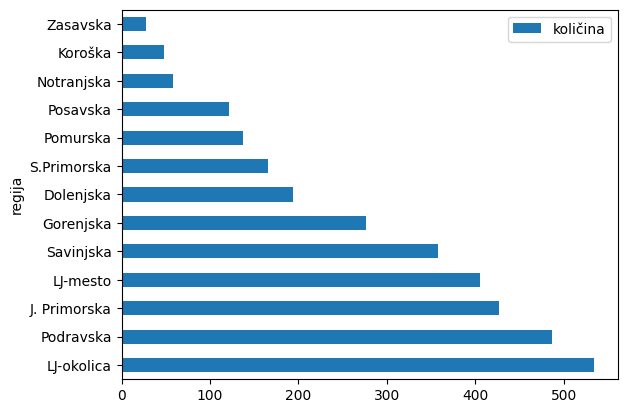

In [205]:
stevilo_his.sort_values("količina", ascending=False).plot.barh()

Največ oglasov za hiše je kot pričakovano v Ljubljani in njeni okolici. Najprej se morda zdi kot da v Ljubljani ni toliko hiš, a pri tem moramo upoštevati, da so ostale regije veliko večje in zato primerjava z Ljubljano ni popolnoma enakovredna. S tem sklepam da je Ljubljana med bolj aželjenimi območji bivanja.
Nato v številu hiš prevladujeta Podravska in Južna Primorska. Tudi to ni presenetljivo, saj je obala zelo poseljeno območje, prav tako podravska regija. 

<AxesSubplot: xlabel='regija'>

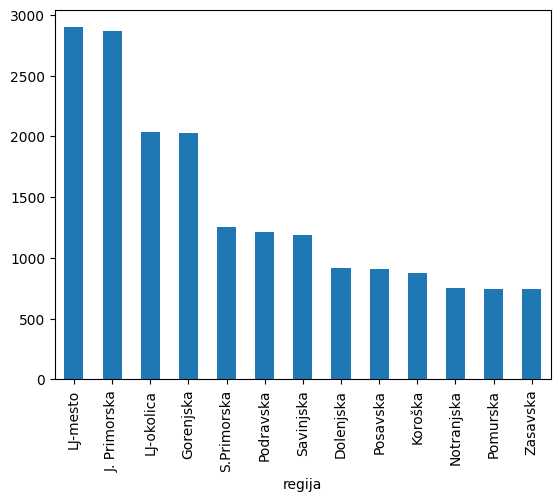

In [216]:
cene_his.sort_values(ascending=False).plot.bar()

Tudi pri cenah dobimo pričakovane rezultate. Hiše v Ljubljani in Južni Primorski kar odstopajo v ceni, presenetljivo pa je da so tudi na Gorenjskem hiše kar drage. Najcenejše so v Notranjski, Pomurski in Zasavski regiji. To odraža povpraševanje na trgu. Ugotavljam da se območja, kjer je prodaja hiš večja tudi ujemajo z območji s večjo povprečno ceno hiš. Torej cene niso velike zaradi primanjkovanja ponudbe, temveč zaradi velikega povpraševanja.

## Vrsta gradnje glede na regijo
Poglejmo še katera gradnja je najbolj popularna v kateri regiji.

<AxesSubplot: >

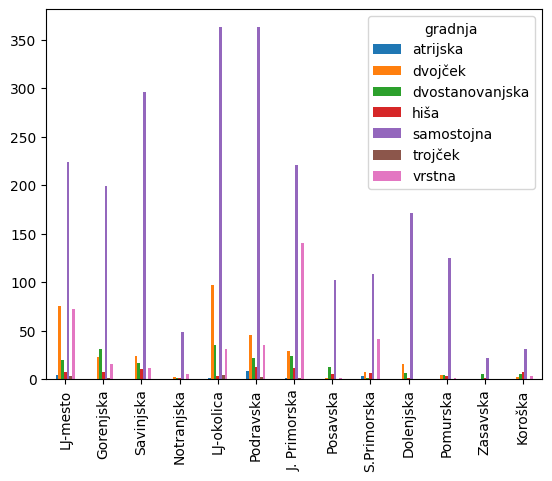

In [231]:
podatki = []
for reg in hise["regija"].unique():
    podatki_regija = hise[hise.regija == reg].groupby("gradnja").size().to_frame(reg)
    podatki.append(podatki_regija)
df = pd.concat(podatki, axis=1).T
df.plot.bar()

In [344]:
hise.groupby("gradnja")["cena_m2"].mean().to_frame().sort_values("cena_m2")

,cena_m2
gradnja,
hiša,1259.615214
samostojna,1678.086616
dvostanovanjska,1685.504861
dvojček,2103.913220
vrstna,2243.968964
atrijska,2371.037466
trojček,2608.181589


Vsepovsod prevladuje samostojna gradnja, v Ljubljani in okolici imamo več dvojčkov, v količini vrstnih hiš pa prevladuje Južna primorska. Tam je ta način gradnje tradicionalen, eden od razlogov za to bi lahko bila burja, saj z gradnjo vrstnih hiš zmanjšajo njen vpliv. Vrstne hiše so povprečno dražje kot samostojne, tako da se to da jih je veliko v Južni Primorski, vrjetno odraža tudi v tamkajšnji višji povprečni ceni. Isti sklep lahko naredimo za Ljubljano in njeno okolico, kjer je več dvojčkov in nekaj vrstnih hiš, ter posledično višja pvprečna cena. Na povprečno ceno pa ne vpliva le vrsta gradnje, saj bi potem morala biti tudi cena Podravske regije, ki vsebuje atrijske hiše in dvojčke, in cena Severne Primorske, ta vsebuje več vrstnih hiš, večja, a temu ni tako. To nam pove da na ceno vpliva tudi lokacija. 

In [368]:
hise_povrsina = hise.groupby("regija")["povrsina"].mean().to_frame("Povprečna površina").sort_values("Povprečna površina")
povprecna = hise_povrsina["Povprečna površina"].mean()
hise_povrsina["Odstopanje"] = abs(hise_povrsina["Povprečna površina"] - povprecna)
hise_povrsina

,Povprečna površina,Odstopanje
regija,,
Dolenjska,210.930155,29.331822
S.Primorska,211.686386,28.575591
Podravska,212.528522,27.733455
J. Primorska,222.463396,17.798580
LJ-okolica,225.467697,14.794280
Savinjska,230.754693,9.507284
Pomurska,232.598394,7.663582
Posavska,243.932314,3.670338
LJ-mesto,247.983432,7.721456


In [366]:
hise_povrsina["Povprečna površina"].mean()

240.26197624121454

<AxesSubplot: xlabel='regija'>

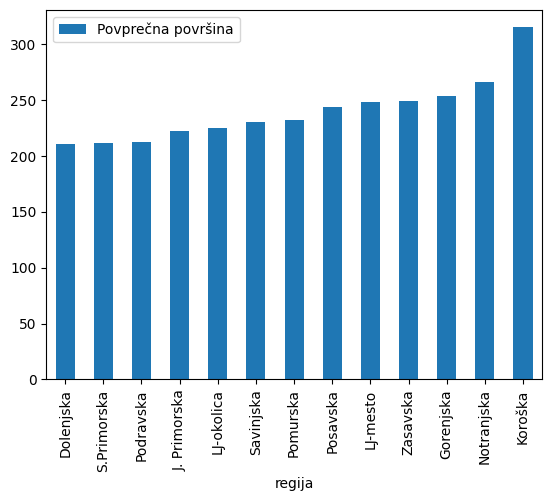

In [355]:
hise_povrsina.plot.bar()

Na Koroškem je so na prodaj hiše z največjo površino, medtem ko drugače razlika med povprečnimi površinami prodajnih hiš glede na regije ni tako velika. Večje hiše so v regijah kjer jih je manj. Torej če primerjamo  grafom poradelitve oglasev hiš glede na regijo so to ravne zgornje regije (Notranjska, Koroška, Zasavska in Posavska). 
Povprečna velikost prodajnih hiš je 240 m2. Odstopanja od tega glede na regijo če ne štejemo koroške je zgolj 30 m2.

## Prodaja hiš po Ljubljani in razlikovanje v cenah
Zaradi velikega odstopanja Ljubljane v primerjavi z ostalimi regijami, sem se odločila pobližje pogledati oglase za hiše v Ljubljani.

In [217]:
hise_ljubljana = hise[hise.obcina == "Ljubljana"]

<AxesSubplot: >

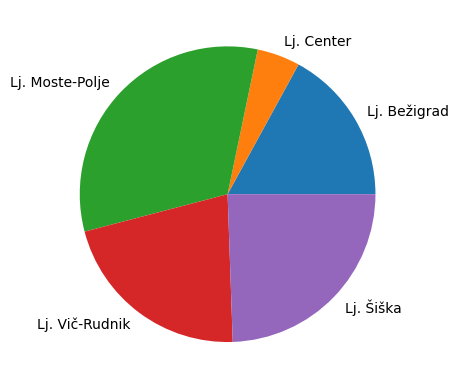

In [348]:
hise_ljubljana.groupby("upravna").size().plot.pie()

Največ hiš na trgu je iz upravne enote Ljubljana Moste-Polje in Ljubljana Šiška. Sledita Rudnik in Bežigrad. Najmanj pa je prodajnih hiš v centru Ljubljane.

<AxesSubplot: ylabel='cena_m2'>

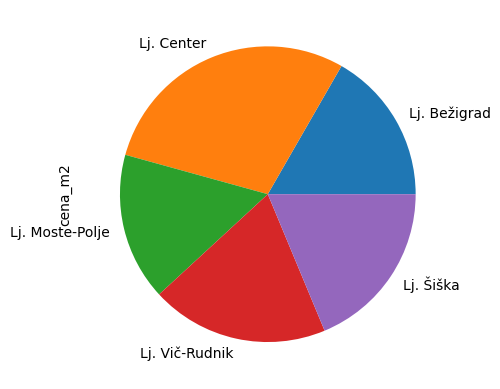

In [341]:
hise_ljubljana.groupby("upravna")["cena_m2"].mean().plot.pie()

Cena hiš v centru je sicer največja, a razen tega je cena dokaj enakomerno razporejena glede na upravne enote. 

<AxesSubplot: >

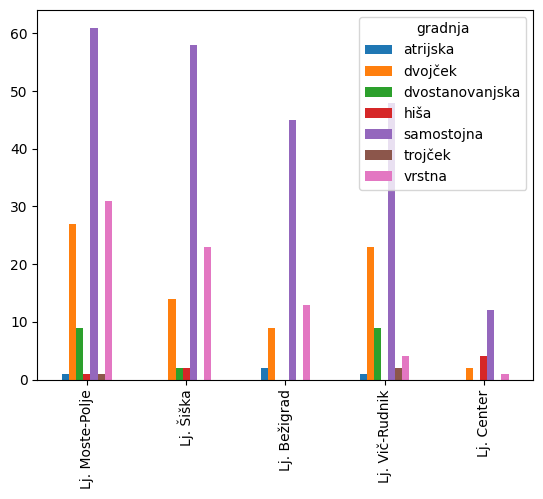

In [345]:
podatki2 = []
for uprava in hise_ljubljana["upravna"].unique():
    podatki_uprava = hise[hise.upravna == uprava].groupby("gradnja").size().to_frame(uprava)
    podatki2.append(podatki_uprava)
df = pd.concat(podatki2, axis=1).T
df.plot.bar()

Tudi tu v vseh upravnih enotah prevladuje gradnja samostojnih hiš, v centru Ljubljane je na prodaj kar nekaj "hiš", za katere podatek o načinu gradnje ni bil podan. Presentljivo v centru ni na prodaj veliko vrstnih hiš. Na Bežigradu imamo največ atrijskih hiš, a vseeno dokaj malo. Slednja in Moste sta tudi edini lokaciji ki ponujata nakup hiše trojčka. 

## Trendi grajenja hiš glede na leta

<AxesSubplot: xlabel='zaookrozeno_leto'>

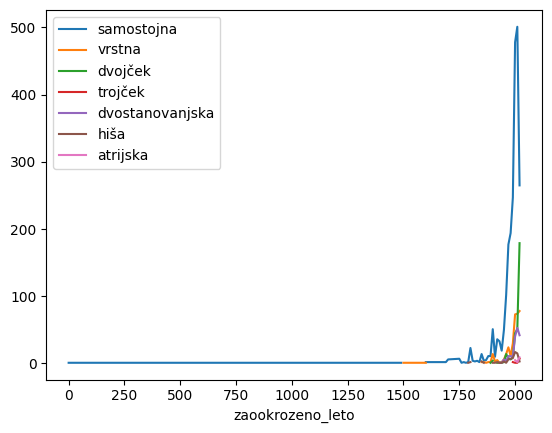

In [324]:
skupaj = []
for grad in hise["gradnja"].unique():
    grad = hise[hise["gradnja"] == grad].groupby("zaookrozeno_leto").size().to_frame(grad)
    skupaj.append(grad)
hise_po_gradbi = pd.concat(skupaj, axis=1)
hise_po_gradbi.sort_index().plot()

<AxesSubplot: xlabel='zaookrozeno_leto'>

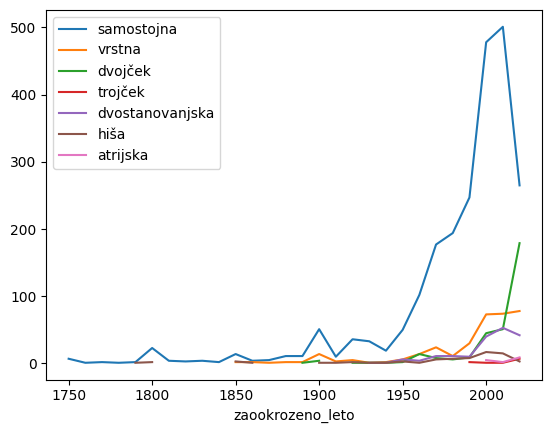

In [323]:
hise_po_gradbi[hise_po_gradbi.index > 1700].sort_index().plot()

Pri opazovanju načina gradnje glede na leto izgradnje, lahko opazimo da je za prodajne hiše izpred leta 1750 prevladovala zgolj samostojna gradnja, zato sem nato narisala še en graf za gradnjo po letu 1700. 
Po letu 1950 se graf začne bolj izrazito dvigovati glede na gradnjo hiš. Gradnje samostojnih hiš je bila stalno prevladujoča, po letu 1950 pa je začela še bolj naraščati. Trend gradnje dvojčkov je prišel v letih 1990 in še narašča. Prav tako narašča gradnja vrstnih hiš. Gradnja dvostanovanjskih hiš je nekoliko upadla.
S tem ko je postala gradnja ostalih vrst hiš bolj popularna (po letu 2000) je gradnja samostojnih hiš nekoliko upadla.

# Zaključek
**Ali vpliva leto izgradnje na ceno?**

Da, leto izgradnje vpliva, saj cena narašča z opaovanje hiš grajenih v kasnejših letih. V letih pred 1980 vpliva tudi če opazzujemo leto gradnje ali leto adaptacije. Ugotavljamo pa, da od leta 1980 cene novogradnje od cen hiš, ki so istega leta adaptirane niso tako različne, kljub starejši gradnji. Torej so starejše, adaptirane hiše danes še vedno zaželjene na trgu. 

**Je v Ljubljani cena hiš veliko večja?**

Lokacija močno vpliva na cene hiš. Najvišje cene so bile prav v Ljubljani in njeni okolici ter pa v Južni Primorski. Razlogi a to bi lahko bili gospodarska ravitost Ljubljane, dobra infrastruktura in službene priložnosti, pri Južni Primorski pa vremenske razmere, bližina morja in priljubljenost. Območja z najnižjimi cenami pa so bila Koroška, Notranjska in Zasavska. Vrjetno prav zaradi pomanjkanja zgornjih lastnosti. 

**Za katere regije je bolj značilna gradnja dvojčkov in večjih hiš?**

Gradnja dvojčkov je najbolj značilna za Ljubljano in okolico, Podravsko regijo in Južno Primorsko. Prodaja večjih hiš je značilna za Koroško, vendar je razlika z ostalimi regijami dokaj majhna. Odstopanja od povprečne površine hiše, ki je 240m2, so bila 70m2 če štejemo Koroško, brezz nje pa zgolj 30m2.

**Se lahko opazi kakšen trend kakšne hiše so bile grajene glede na leto izgradnje?**

Skozi vsa leta je prevladovala gradnja samostojnih hiš za prodajo, v kasnejših letih pa se je na trgu pojavilo tudi več dvojčkov, vrstnih hiš in dvostanovanjskih. S tem je prodaja samostojnih nekoliko upadla.

Analiza bi bila lahko še boljša, če bi imela za vsako hišo podano tako leto izgradnje, kot leto adaptacije. Prav tako bi lahko ob bolj natančni konstrukciji spletne strani ločila površino hiše in površino vrtov, ter tako analizarala tudi to.